
Logistic Regression Evaluation Metrics:
Test Set:
Accuracy: 0.6285
Precision: 0.2823834196891192
Recall: 0.5356265356265356
F1 Score: 0.36980491942324

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.65      0.74      1593
           1       0.28      0.54      0.37       407

    accuracy                           0.63      2000
   macro avg       0.56      0.59      0.55      2000
weighted avg       0.73      0.63      0.66      2000



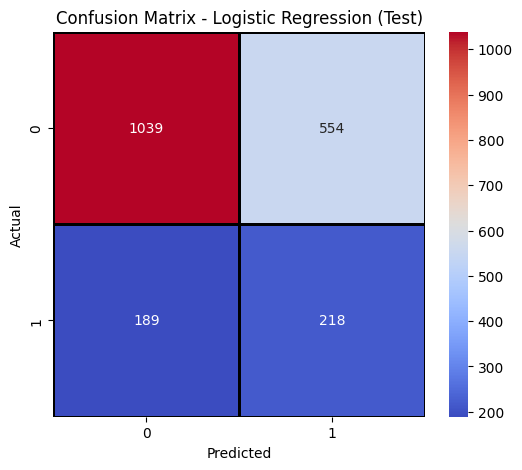

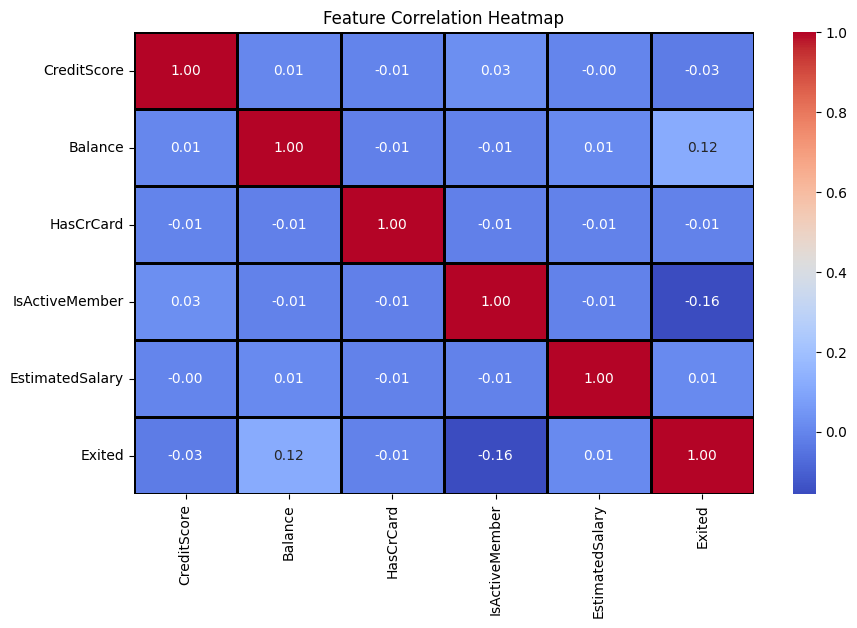

In [ ]:
# Import necessary libraries
#Logistic regression with 5 features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/content/Churn_Modelling.csv")  # Change this path if needed

# Feature selection
selected_features = ["CreditScore",  "Balance","HasCrCard", "IsActiveMember", "EstimatedSalary"]
X = df[selected_features]  # Independent variables
y = df["Exited"]  # Target variable (0 = Not Exited, 1 = Exited)

# Feature engineering: Polynomial Features (only interaction terms)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize numerical features (Standardization)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, scoring='f1', cv=5, n_jobs=-1)

# Train model on resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Get best model
best_log_reg = log_reg.best_estimator_

# Predictions
log_reg_train_pred = best_log_reg.predict(X_train_resampled)
log_reg_test_pred = best_log_reg.predict(X_test)

# Function to print evaluation metrics
def evaluate_model(name, y_true_train, y_pred_train, y_true_test, y_pred_test):
    print(f"\n{name} Evaluation Metrics:")
    print("Test Set:")
    print("Accuracy:", accuracy_score(y_true_test, y_pred_test))
    print("Precision:", precision_score(y_true_test, y_pred_test))
    print("Recall:", recall_score(y_true_test, y_pred_test))
    print("F1 Score:", f1_score(y_true_test, y_pred_test))
    print("\nClassification Report (Test Set):\n", classification_report(y_true_test, y_pred_test))

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_train_resampled, log_reg_train_pred, y_test, log_reg_test_pred)

# Confusion Matrices
log_reg_cm_test = confusion_matrix(y_test, log_reg_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor="black")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(log_reg_cm_test, "Confusion Matrix - Logistic Regression (Test)")



''''plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Logistic Regression")
plt.show()'''

# Heatmap of Feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_features + ["Exited"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Feature Correlation Heatmap")
plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Missing Values:
RowNumber          0
CustomerId         0
Surname  

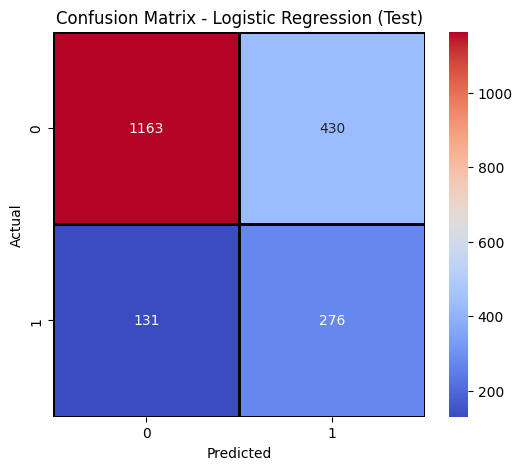

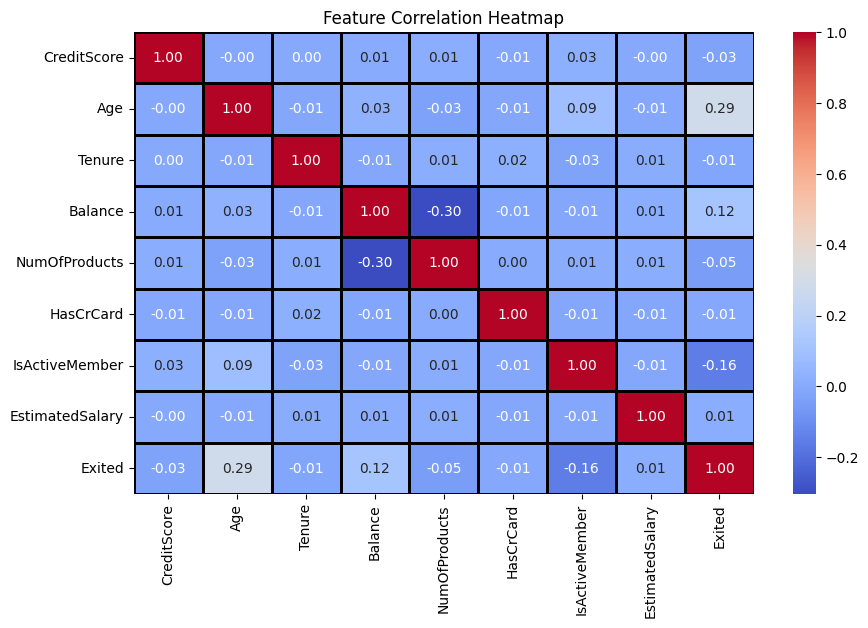

In [ ]:
# Import necessary libraries
#Logistic regression with  10 features




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/content/Churn_Modelling.csv")  # Update with the correct dataset path

# Display dataset info
print("Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any) - Here, we drop rows with missing values
df.dropna(inplace=True)  # Remove rows with missing values

# Remove duplicate records
df.drop_duplicates(inplace=True)

# Feature selection
selected_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
                     "HasCrCard", "IsActiveMember", "EstimatedSalary"]
X = df[selected_features]  # Independent variables
y = df["Exited"]  # Target variable (0 = Not Exited, 1 = Exited)

# Feature engineering: Polynomial Features (only interaction terms)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize numerical features (Standardization)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, scoring='f1', cv=5, n_jobs=-1)

# Train model on resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Get best model
best_log_reg = log_reg.best_estimator_

# Predictions
log_reg_train_pred = best_log_reg.predict(X_train_resampled)
log_reg_test_pred = best_log_reg.predict(X_test)

# Function to print evaluation metrics
def evaluate_model(name, y_true_train, y_pred_train, y_true_test, y_pred_test):
    print(f"\n{name} Evaluation Metrics:")
    print("Test Set:")
    print("Accuracy:", accuracy_score(y_true_test, y_pred_test))
    print("Precision:", precision_score(y_true_test, y_pred_test))
    print("Recall:", recall_score(y_true_test, y_pred_test))
    print("F1 Score:", f1_score(y_true_test, y_pred_test))
    print("\nClassification Report (Test Set):\n", classification_report(y_true_test, y_pred_test))

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_train_resampled, log_reg_train_pred, y_test, log_reg_test_pred)

# Confusion Matrices
log_reg_cm_test = confusion_matrix(y_test, log_reg_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor="black")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(log_reg_cm_test, "Confusion Matrix - Logistic Regression (Test)")

# Feature Importance Fix: Remove Interaction Terms
feature_importance = abs(best_log_reg.coef_).flatten()
feature_names = poly.get_feature_names_out(selected_features)

# Create DataFrame for sorting and filtering
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Remove interaction terms (keep only original features)
feature_imp_df = feature_imp_df[feature_imp_df['Feature'].isin(selected_features)]

# Sort features by importance
feature_imp_df = feature_imp_df.sort_values(by="Importance", ascending=False)



# Heatmap of Feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_features + ["Exited"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Feature Correlation Heatmap")
plt.show()


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:33:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized Accuracy: 0.8427
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1536
           1       0.61      0.60      0.61       390

    accuracy                           0.84      1926
   macro avg       0.76      0.75      0.75      1926
weighted avg       0.84      0.84      0.84      1926



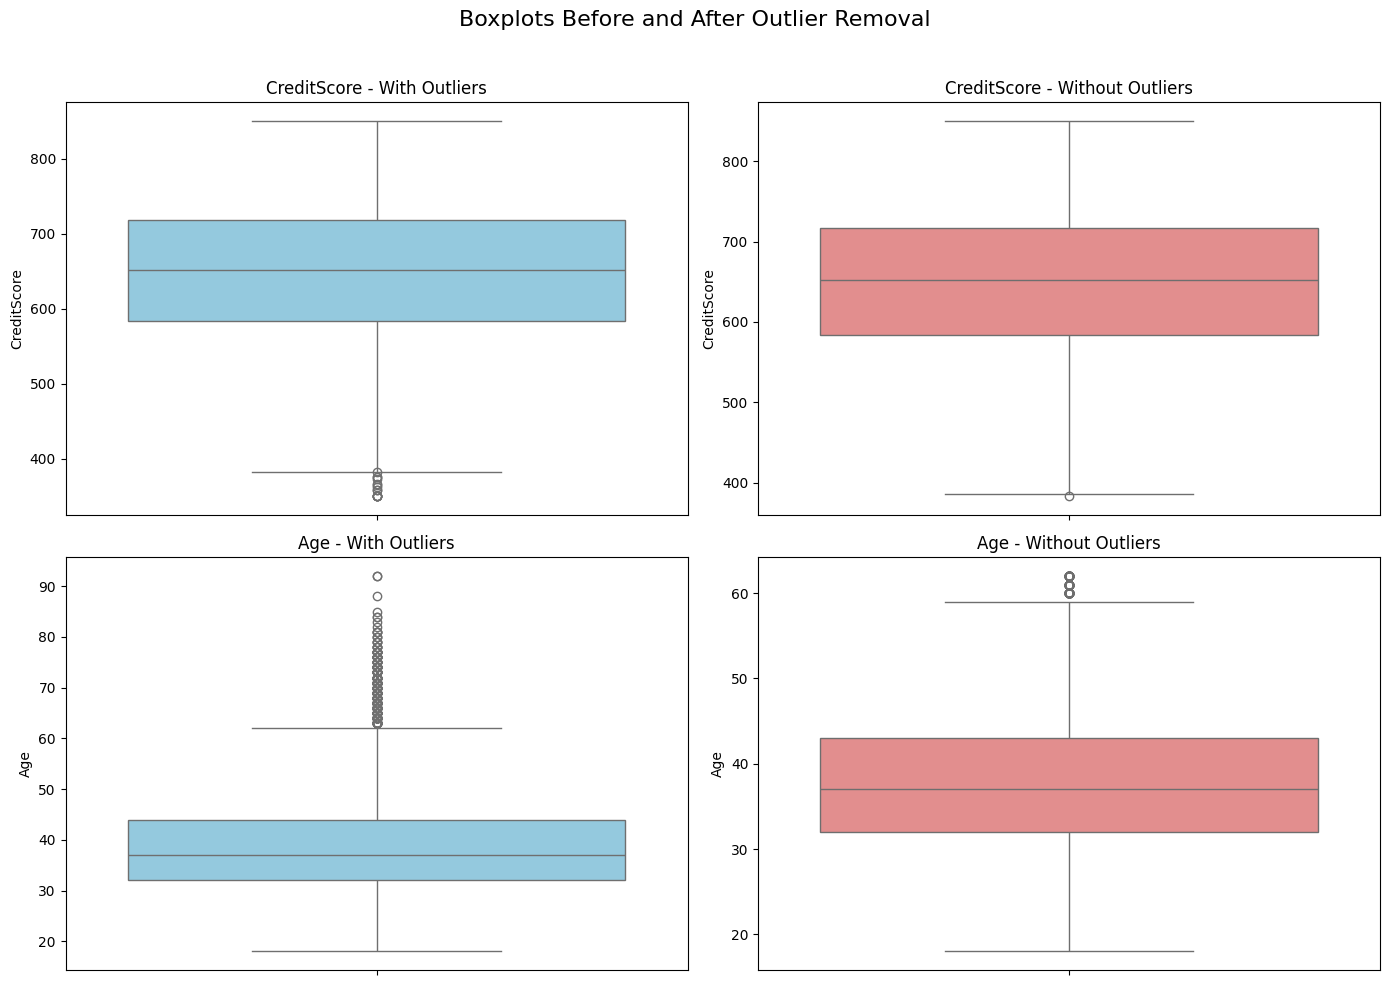

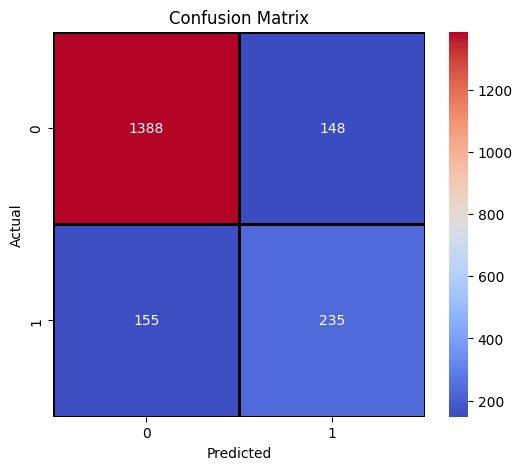

<ipython-input-5-c8dbbf954246>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=[f"PCA_{i}" for i in range(len(feature_importance))], palette="coolwarm")


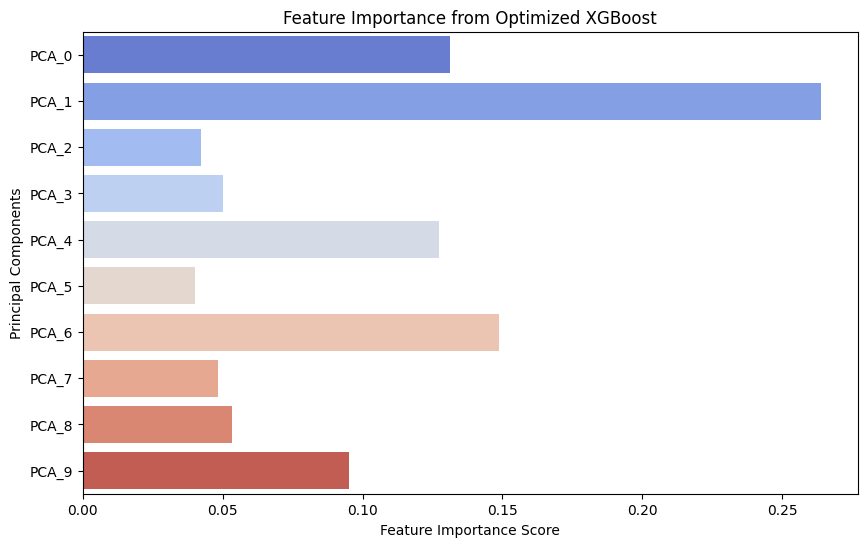

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Drop missing values
df.dropna(inplace=True)

# Define numerical columns for outlier detection
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Remove outliers using IQR
df_clean = df.copy()
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Encode categorical features
categorical_cols = ['Gender', 'Geography']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Define features and target variable
X = df_clean.drop(columns=['Exited', 'CustomerId', 'Surname', 'RowNumber'], errors='ignore')
y = df_clean['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale data
scaler = RobustScaler()  # Handles outliers better
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_resampled = pca.fit_transform(X_train_resampled)
X_test = pca.transform(X_test)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(tree_method='hist', use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Train the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ----------------- Boxplots for Outliers -----------------
numerical_cols = ['CreditScore', 'Age']

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Boxplots Before and After Outlier Removal", fontsize=16)

# Plot before removing outliers
sns.boxplot(y=df['CreditScore'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("CreditScore - With Outliers", fontsize=12)

sns.boxplot(y=df['Age'], ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("Age - With Outliers", fontsize=12)

# Plot after removing outliers
sns.boxplot(y=df_clean['CreditScore'], ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title("CreditScore - Without Outliers", fontsize=12)

sns.boxplot(y=df_clean['Age'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title("Age - Without Outliers", fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------- Confusion Matrix -----------------
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor="black")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----------------- Feature Importance -----------------
feature_importance = best_xgb.feature_importances_

# Fix: Match PCA components instead of original feature names
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=[f"PCA_{i}" for i in range(len(feature_importance))], palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Principal Components")
plt.title("Feature Importance from Optimized XGBoost")
plt.show()
